In [2]:
import json
import networkx as nx

# 读取JSON文件
def load_json_topology(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 解析JSON数据并构建图
def build_graph_from_json(data):
    G = nx.Graph()  # 或者使用 nx.DiGraph() 如果是需要有向图
    
    # 添加节点
    for id,node in data['nodes'].items():
        # 使用节点 ID 作为唯一标识符
        G.add_node(node['id'],**node)
    
    # 添加边
    for link in data['links']:
        from_id = link['from']
        to_id = link['to']
        if from_id is not None and to_id is not None:
            G.add_edge(from_id, to_id, 
                       bandwidth=int(link['bandwidth']), 
                       latency=int(link['latency']))
    
    return G

# 指定文件路径
file_path = '..\\topo_zone\process_topologies\\new_Aarnet.json'
# 加载JSON文件
data = load_json_topology(file_path)
# 构建图
G = build_graph_from_json(data)

# 输出图的信息
print("Nodes of graph: ", G.nodes(data=True))
print("Edges of graph: ", G.edges(data=True))

Nodes of graph:  [('s0', {'id': 's0', 'label': 'Sydney10', 'dpid': '1', 'node_type': 'switch', 'longitude': '151.20732', 'latitude': '-33.86785', 'ip': '10.0.0.1', 'betweenness': 0.246, 'malicious_flows': 0.0591, 'costs': 11.7048, 'filtering_capacities': 0.738, 'hosts': ['10.0.18.30', '10.0.178.54', '10.0.105.145', '10.0.110.229', '10.0.78.185', '10.0.194.122', '10.0.187.130', '10.0.33.178', '10.0.234.206', '10.0.194.182', '10.0.79.100', '10.0.226.11', '10.0.128.129', '10.0.177.1', '10.0.127.218', '10.0.208.200', '10.0.100.176', '10.0.135.11', '10.0.128.81', '10.0.89.239', '10.0.175.177', '10.0.188.226', '10.0.148.44', '10.0.159.158', '10.0.201.172', '10.0.76.201', '10.0.0.18', '10.0.254.37', '10.0.123.152', '10.0.221.127', '10.0.108.4', '10.0.35.204', '10.0.124.187', '10.0.240.40', '10.0.184.175', '10.0.249.118', '10.0.94.1', '10.0.223.214', '10.0.170.116', '10.0.182.198', '10.0.107.2', '10.0.183.152', '10.0.7.238', '10.0.135.86', '10.0.174.241', '10.0.68.228', '10.0.187.241', '10.0.5

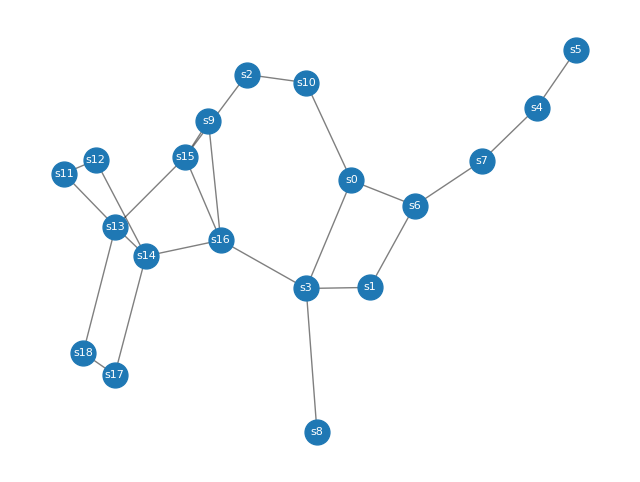

In [15]:
import matplotlib.pyplot as plt
# 绘制图形

# 绘制图形
plt.figure(figsize=(8, 6))
# 使用 spring_layout 生成节点位置布局
pos = nx.spring_layout(G)
# # 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=320)
# # 绘制边
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
# # 绘制标签
nx.draw_networkx_labels(G, pos, font_size=8, font_color="w",font_family="sans-serif")
# 显示图
plt.axis('off')
plt.show()

In [4]:
import networkx as nx

victim_node = "s1"  # 受害者节点的ID
# 生成最短路径生成树
def generate_sp_tree(graph, root):
    sp_tree = nx.DiGraph()
    shortest_paths = nx.shortest_path_length(graph, source=root)
       
    # 创建一个字典来存储每个节点的父节点
    parent_dict = {}
    
    # 遍历最短路径字典
    for node, length in shortest_paths.items():
        if node == root:
            continue  # 跳过根节点
        # 寻找父节点
        for neighbor in graph:  # 遍历图中的所有节点
            if graph.has_edge(neighbor, node) and \
               length == shortest_paths[neighbor] + 1 and \
               neighbor in shortest_paths:
               parent_dict[node] = neighbor

    
    # 构建最短路径树
    for child, parent in parent_dict.items():
        sp_tree.add_edge(parent, child)
    
    return shortest_paths,sp_tree


# 假设 G 是一个已经定义好的图
shortest_paths,sp_tree = generate_sp_tree(G, victim_node)
print(shortest_paths)
print(sp_tree)

{'s1': 0, 's3': 1, 's6': 1, 's0': 2, 's8': 2, 's16': 2, 's7': 2, 's10': 3, 's9': 3, 's14': 3, 's15': 3, 's4': 3, 's2': 4, 's12': 4, 's13': 4, 's17': 4, 's5': 4, 's11': 5, 's18': 5}
DiGraph with 19 nodes and 18 edges


In [5]:
node_ids = list(shortest_paths.items())
print(node_ids)
children = list(sp_tree.successors('s1'))
print(children)

[('s1', 0), ('s3', 1), ('s6', 1), ('s0', 2), ('s8', 2), ('s16', 2), ('s7', 2), ('s10', 3), ('s9', 3), ('s14', 3), ('s15', 3), ('s4', 3), ('s2', 4), ('s12', 4), ('s13', 4), ('s17', 4), ('s5', 4), ('s11', 5), ('s18', 5)]
['s3', 's6']


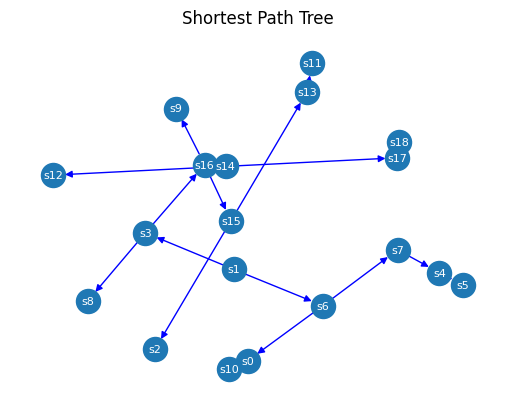

In [6]:
# 绘制图


def draw_graph(graph, title="Graph"):
    pos = nx.spring_layout(graph)  # positions for all nodes
    nx.draw_networkx_nodes(graph, pos, node_size=300)
    nx.draw_networkx_edges(graph, pos, edgelist=graph.edges(),edge_color="b")
    nx.draw_networkx_labels(graph, pos, font_size=8,font_color='w',font_family="sans-serif")
    plt.title(title)
    plt.axis('off')
    plt.show()

# 使用 tree_layout 来绘制最短路径树


# 绘制最短路径树
draw_graph(sp_tree, "Shortest Path Tree")

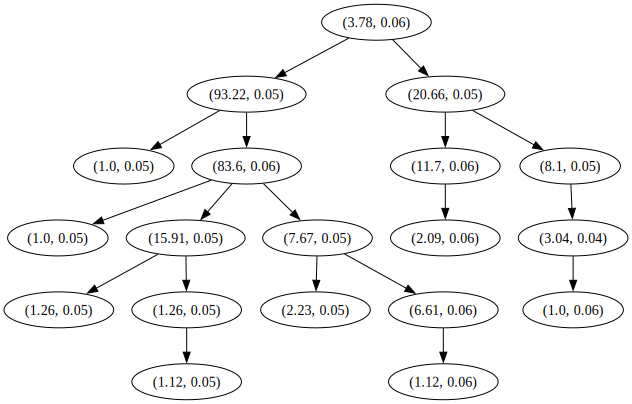

In [7]:
from graphviz import Digraph, Source
import sys

# 定义绘制图形的函数
def draw_data_and_save_tree(tree, title="Tree", filename="tree", format="png", width=None, height=None):
    # 创建一个有向图
    dot = Digraph(comment=title, format=format)

    # 设置图形的宽度和高度（单位为英寸）
    if width is not None and height is not None:
        dot.attr(size=f"{width},{height}", rankdir='TD')  # TD 表示从上到下

    # 添加节点和边
    for node in tree.nodes():
        costs=round(G.nodes[node]['costs'],2)
        malicious_flows=round(G.nodes[node]['malicious_flows'],2)
        dot.node(name=str(node),label=f"{costs,malicious_flows}")

    for edge in tree.edges():
        dot.edge(str(edge[0]), str(edge[1]))

    # 保存图形到文件
    dot.render(filename, format=format)
    
    # 如果在 Jupyter Notebook 中，则也显示图形
    if 'IPython' in sys.modules:
        return Source(dot.source)

# 假设 sp_tree 是一个有效的 NetworkX 图对象
# 绘制最短路径树并保存为PNG文件，指定宽度为8英寸，高度为6英寸
draw_data_and_save_tree(sp_tree, "Shortest Path Tree with data", filename="shortest_path_tree_data_png", format="png", width=10, height=10)

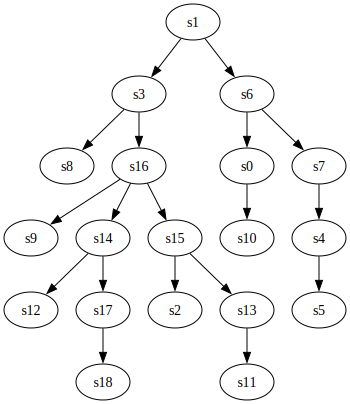

In [8]:
from graphviz import Digraph, Source
import sys

# 定义绘制图形的函数
def draw_and_save_tree(tree, title="Tree", filename="tree", format="png", width=None, height=None):
    # 创建一个有向图
    dot = Digraph(comment=title, format=format)

    # 设置图形的宽度和高度（单位为英寸）
    if width is not None and height is not None:
        dot.attr(size=f"{width},{height}", rankdir='TD')  # TD 表示从上到下

    # 添加节点和边
    for node in tree.nodes():
        dot.node(str(node))

    for edge in tree.edges():
        dot.edge(str(edge[0]), str(edge[1]))

    # 保存图形到文件
    dot.render(filename, format=format)
    
    # 如果在 Jupyter Notebook 中，则也显示图形
    if 'IPython' in sys.modules:
        return Source(dot.source)

# 假设 sp_tree 是一个有效的 NetworkX 图对象
# 绘制最短路径树并保存为PNG文件，指定宽度为8英寸，高度为6英寸
draw_and_save_tree(sp_tree, "Shortest Path Tree", filename="shortest_path_tree_png", format="png", width=5, height=10)

In [9]:

import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import IntegerRandomSampling
from pymoo.optimize import minimize
from pymoo.core.problem import ElementwiseProblem
from pymoo.operators.repair.rounding import RoundingRepair

# 定义问题
class LFADefenseProblem(ElementwiseProblem):
    def __init__(self, num_nodes,node_ids, costs, malicious_flows, filtering_capacities, threshold):
        super().__init__(n_var=num_nodes, n_obj=2, n_constr=1, xl=0, xu=1)
        self.node_ids = node_ids
        self.node_ids_reversed = list(self.node_ids)[::-1]  # 使用切片来创建一个反转的新列表
        self.costs = costs
        self.malicious_flows = malicious_flows
        self.filtering_capacities = filtering_capacities
        self.threshold = threshold

    def _evaluate(self, x, out, *args, **kwargs):
        # X为选择的过滤节点向量,已按最短路径树处理,例如[0,1,0,1,..]
        # 初始化未过滤恶意流向量
        unfiltered_flows = self.malicious_flows.copy()

        # 更新未过滤恶意流
        # 从树底部更新
        for node_id in self.node_ids_reversed:
            children = list(sp_tree.successors(node_id))
            node_index = self.node_ids.index(node_id)
            if node_id == victim_node:
                #如果是受害者根节点
                total_upstream = sum(unfiltered_flows[child] for child in children)
                unfiltered_flows[node_id] += total_upstream
                
            if len(children)>0:
                # 如果节点不是叶子节点，计算未过滤流量
                total_upstream = sum(unfiltered_flows[child] for child in children)
                unfiltered_flows[node_id] += total_upstream
                unfiltered_flows[node_id] -= x[node_index] * self.filtering_capacities[node_id]
                unfiltered_flows[node_id] = max(0, unfiltered_flows[node_id])
            else:
                unfiltered_flows[node_id] -= x[node_index] * self.filtering_capacities[node_id]
                unfiltered_flows[node_id] = max(0, unfiltered_flows[node_id])
                
        # 到达受害者的恶意流
        malicious_flow_to_victim = unfiltered_flows[victim_node]

        # 计算总成本
        total_cost = np.sum(x * list(self.costs.values()))

        # 设置目标函数值(2个适应度函数)
        out["F"] = [total_cost, malicious_flow_to_victim]

        # 检查约束条件
        if malicious_flow_to_victim > self.threshold:
            out["G"] = [malicious_flow_to_victim - self.threshold]
        else:
            out["G"] = [0]

# 预设参数
num_nodes = len(G.nodes)  # 节点数
node_ids = list(shortest_paths.keys())
nodes = G.nodes
costs = {}              # 成本向量
malicious_flows = {}    # 恶意流比例向量
filtering_capacities = {}  # 过滤能力向量
threshold = 0.2          # 阈值

for node_id in node_ids:
    costs[node_id] = nodes[node_id]['costs']
    malicious_flows[node_id] = nodes[node_id]['malicious_flows']
    filtering_capacities[node_id] = nodes[node_id]['filtering_capacities']
problem = LFADefenseProblem(num_nodes,node_ids, costs, malicious_flows, filtering_capacities, threshold)

# 遗传算法参数
algorithm = NSGA2(
    pop_size=92,
    n_offsprings=10,
    crossover=SBX(prob=0.9, eta=15,repair=RoundingRepair()),
    mutation=PM(prob=0.9, eta=20, repair=RoundingRepair()),
    eliminate_duplicates=True,
    sampling = IntegerRandomSampling()
)

# 执行优化
res = minimize(problem,
               algorithm,
               ('n_gen', 400),
               seed=1,
               verbose=False)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))



Best solution found: 
X = [[1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1]
 [1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0]]
F = [[1.021234e+02 6.890000e-02]
 [4.801910e+01 7.050000e-02]
 [1.021354e+02 0.000000e+00]
 [3.575390e+01 1.727000e-01]
 [4.716910e+01 1.695000e-01]]


In [10]:
for x in res.X:
    print(x)


[1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1]
[1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0]


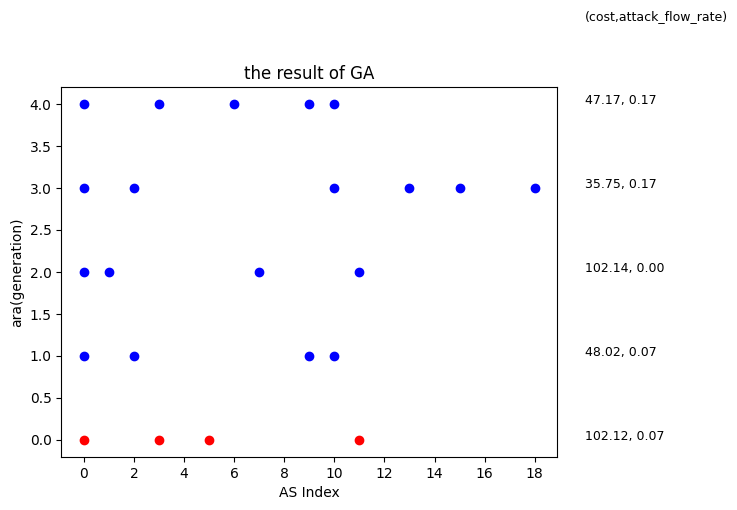

In [11]:
from matplotlib.ticker import MaxNLocator
# 创建一个图形窗口
plt.figure()

# 循环遍历每一行数据
for i, row in enumerate(res.X):
    # 查找每一行中值为1的索引位置
    cols_with_ones = np.where(np.array(row) == 1)[0]
    # 在图上标记出值为1的位置
    if i == 0:
        plt.scatter(cols_with_ones, [i]*len(cols_with_ones), color='red')
    else:
        plt.scatter(cols_with_ones, [i]*len(cols_with_ones), color='blue')

    txt = res.F[i]    
    # 保留两位小数格式化数值
    formatted_txt = ("%.2f, %.2f" % (txt[0], txt[1]))
    # 在每个点的上方添加文本标注
    plt.text(len(row)+1, i, formatted_txt, fontsize=9)
plt.text(len(row)+1, len(res.X), "(cost,attack_flow_rate)", fontsize=9)

# 设置图形的标题和坐标轴标签
plt.title('the result of GA')
plt.xlabel('AS Index')
plt.ylabel('ara(generation)')
# 设置横轴为整数刻度
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
# 显示图形
plt.show()

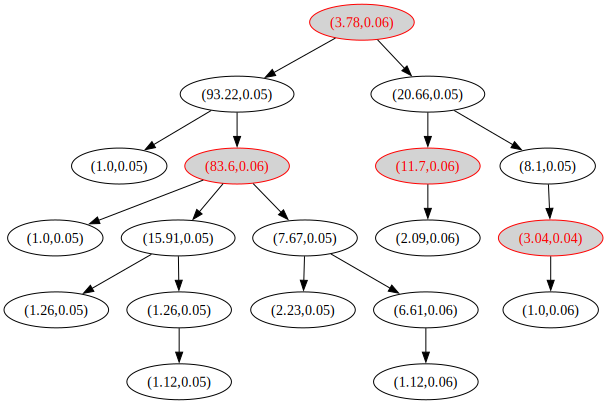

In [12]:
from graphviz import Digraph, Source
import sys

best_nodes = []  # 示例节点ID列表
for i,selected in enumerate(res.X[0]):
    if selected == 1:
        best_nodes.append(node_ids[i])
# 定义绘制图形的函数
def draw_data_and_save_tree(tree, title="Tree", filename="tree", format="png", width=None, height=None):
    # 创建一个有向图
    dot = Digraph(comment=title, format=format)

    # 设置图形的宽度和高度（单位为英寸）
    if width is not None and height is not None:
        dot.attr(size=f"{width},{height}", rankdir='TD')  # TD 表示从上到下

    # 添加节点和边
    for node in tree.nodes():
        costs=round(G.nodes[node]['costs'],2)
        malicious_flows=round(G.nodes[node]['malicious_flows'],2)
        # 检查是否需要设置红色边框及标签
        if node in best_nodes:
            dot.node(name=str(node), label=f"({costs},{malicious_flows})", 
                     style='filled', color='red', fillcolor='lightgrey', fontcolor='red')
        else:
            dot.node(name=str(node), label=f"({costs},{malicious_flows})")

    for edge in tree.edges():
        dot.edge(str(edge[0]), str(edge[1]))

    # 保存图形到文件
    dot.render(filename, format=format)
    
    # 如果在 Jupyter Notebook 中，则也显示图形
    if 'IPython' in sys.modules:
        return Source(dot.source)

# 假设 sp_tree 是一个有效的 NetworkX 图对象
# 绘制最短路径树并保存为PNG文件，指定宽度为8英寸，高度为6英寸
draw_data_and_save_tree(sp_tree, "Shortest Path Tree with best S", filename="shortest_path_tree_bset_png", format="png", width=10, height=10)

In [13]:
for f in res.F:
    print(f)

[1.021234e+02 6.890000e-02]
[48.0191  0.0705]
[102.1354   0.    ]
[35.7539  0.1727]
[47.1691  0.1695]


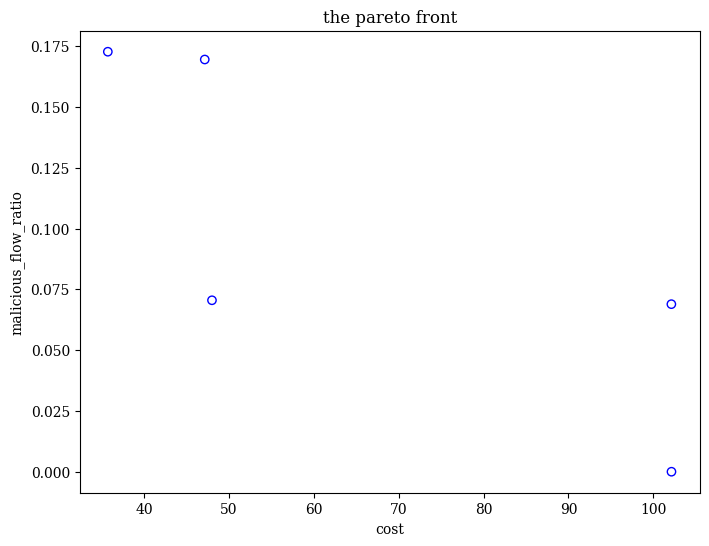

In [14]:
from turtle import color
from pymoo.visualization.scatter import Scatter
plot = Scatter(title="the pareto front")
# res.F存放的是适应度函数值，res.X存放的是对应的决策变量组合
plot.add(res.F, facecolor="none", edgecolor="blue")
# plt.text(res.F[0][0], res.F[0][1], "best point", fontsize=9)
plot.axis_labels = ["cost", "malicious_flow_ratio"]
plot.show()